In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error
import math
val = np.seterr(all='ignore')


# 1) Plot the data (i.e., x-axis for the 1st column, y-axis for the 2nd column)

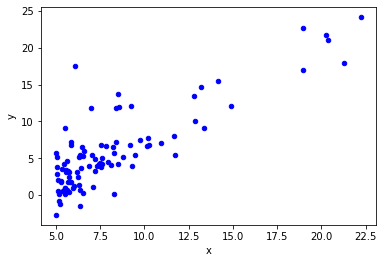

In [2]:
df = pd.read_csv('data2.txt', sep=",", header=None)
df.columns = ["x", "y"]
df.plot(kind='scatter',x='x',y='y',color='blue')
plt.show()

# use Python to implement the following methods to find the coefficients:

# 2) Normal equation, and

Coefficients:  [-3.89578088  1.19303364]


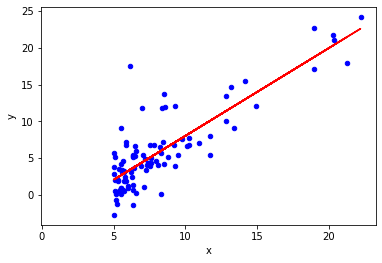

In [3]:
x = df['x'].values
y = df['y'].values
m = len(x)
x_bias = np.ones((m,1))
x = np.reshape(x,(m,1))
x = np.append(x_bias,x,axis=1)
x_transpose = np.transpose(x)
x_transpose_dot_x = x_transpose.dot(x)
temp_1 = np.linalg.inv(x_transpose_dot_x)
temp_2=x_transpose.dot(y)
theta =temp_1.dot(temp_2)
print("Coefficients: ",theta)
y = theta[0] + theta[1]*x
df.plot(kind='scatter',x='x',y='y',color='blue')
plt.plot(x,y,'-',color='red')
plt.show()

# 3) Gradient Descent using batch AND stochastic modes respectively:
    
# a) Split dataset into 80% for training and 20% for testing.

In [4]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

# b) Plot MSE vs. iteration of each mode for both training set and testing set; compare batch and stochastic modes (with discussion) in terms of accuracy (of testing set) and speed of convergence (You need to determine an appropriate termination condition, e.g., when cost function is less than a threshold, and/or after a given number of iterations.)

In [5]:
m = len(x)
x = np.reshape(df['x'].values,(m,1))
y = np.reshape(df['y'].values,(m,1))

In [6]:
#for batch
def cal_cost(theta,X,y):
    cost= np.sum(np.square(((np.dot(X, theta)) - y))) / (2 * (len(X)))  # cost
    return cost

In [7]:
def gradient_descent(x,y,theta,learning_rate=0.01,iterations=1000):
    m = len(y)
    cost_history = np.zeros(iterations)
    theta_history = np.zeros((iterations,2))
    for it in range(iterations):
        prediction = np.dot(x,theta)
        theta = theta -(1/m)*learning_rate*( x.T.dot((prediction - y)))
        theta_history[it,:] = theta.T
        cost_history[it]  = cal_cost(theta,x,y)
    return theta, cost_history, theta_history

In [8]:
lr =0.02
n_iter = 2000
theta = np.random.randn(2,1)
X_b = np.c_[np.ones((len(x),1)),x]
theta,cost_history,theta_history = gradient_descent(X_b,y,theta,lr,n_iter)
print('Theta0:          {:0.3f},\nTheta1:          {:0.3f}'.format(theta[0][0],theta[1][0]))
print('Final cost/MSE:  {:0.3f}'.format(cost_history[-1]))

for it in range(n_iter):
    print("Iterations: ",it," Cost Function Value: ",round(cost_history[it],3))


Theta0:          -3.893,
Theta1:          1.193
Final cost/MSE:  4.477
Iterations:  0  Cost Function Value:  91.745
Iterations:  1  Cost Function Value:  41.555
Iterations:  2  Cost Function Value:  20.703
Iterations:  3  Cost Function Value:  12.036
Iterations:  4  Cost Function Value:  8.43
Iterations:  5  Cost Function Value:  6.927
Iterations:  6  Cost Function Value:  6.297
Iterations:  7  Cost Function Value:  6.029
Iterations:  8  Cost Function Value:  5.912
Iterations:  9  Cost Function Value:  5.858
Iterations:  10  Cost Function Value:  5.83
Iterations:  11  Cost Function Value:  5.813
Iterations:  12  Cost Function Value:  5.8
Iterations:  13  Cost Function Value:  5.789
Iterations:  14  Cost Function Value:  5.779
Iterations:  15  Cost Function Value:  5.769
Iterations:  16  Cost Function Value:  5.76
Iterations:  17  Cost Function Value:  5.751
Iterations:  18  Cost Function Value:  5.742
Iterations:  19  Cost Function Value:  5.732
Iterations:  20  Cost Function Value:  5

Iterations:  484  Cost Function Value:  4.521
Iterations:  485  Cost Function Value:  4.52
Iterations:  486  Cost Function Value:  4.52
Iterations:  487  Cost Function Value:  4.52
Iterations:  488  Cost Function Value:  4.519
Iterations:  489  Cost Function Value:  4.519
Iterations:  490  Cost Function Value:  4.519
Iterations:  491  Cost Function Value:  4.518
Iterations:  492  Cost Function Value:  4.518
Iterations:  493  Cost Function Value:  4.518
Iterations:  494  Cost Function Value:  4.518
Iterations:  495  Cost Function Value:  4.517
Iterations:  496  Cost Function Value:  4.517
Iterations:  497  Cost Function Value:  4.517
Iterations:  498  Cost Function Value:  4.516
Iterations:  499  Cost Function Value:  4.516
Iterations:  500  Cost Function Value:  4.516
Iterations:  501  Cost Function Value:  4.516
Iterations:  502  Cost Function Value:  4.515
Iterations:  503  Cost Function Value:  4.515
Iterations:  504  Cost Function Value:  4.515
Iterations:  505  Cost Function Value

Iterations:  984  Cost Function Value:  4.478
Iterations:  985  Cost Function Value:  4.478
Iterations:  986  Cost Function Value:  4.478
Iterations:  987  Cost Function Value:  4.478
Iterations:  988  Cost Function Value:  4.478
Iterations:  989  Cost Function Value:  4.478
Iterations:  990  Cost Function Value:  4.478
Iterations:  991  Cost Function Value:  4.478
Iterations:  992  Cost Function Value:  4.478
Iterations:  993  Cost Function Value:  4.478
Iterations:  994  Cost Function Value:  4.478
Iterations:  995  Cost Function Value:  4.478
Iterations:  996  Cost Function Value:  4.478
Iterations:  997  Cost Function Value:  4.478
Iterations:  998  Cost Function Value:  4.478
Iterations:  999  Cost Function Value:  4.478
Iterations:  1000  Cost Function Value:  4.478
Iterations:  1001  Cost Function Value:  4.478
Iterations:  1002  Cost Function Value:  4.478
Iterations:  1003  Cost Function Value:  4.478
Iterations:  1004  Cost Function Value:  4.478
Iterations:  1005  Cost Funct

Iterations:  1484  Cost Function Value:  4.477
Iterations:  1485  Cost Function Value:  4.477
Iterations:  1486  Cost Function Value:  4.477
Iterations:  1487  Cost Function Value:  4.477
Iterations:  1488  Cost Function Value:  4.477
Iterations:  1489  Cost Function Value:  4.477
Iterations:  1490  Cost Function Value:  4.477
Iterations:  1491  Cost Function Value:  4.477
Iterations:  1492  Cost Function Value:  4.477
Iterations:  1493  Cost Function Value:  4.477
Iterations:  1494  Cost Function Value:  4.477
Iterations:  1495  Cost Function Value:  4.477
Iterations:  1496  Cost Function Value:  4.477
Iterations:  1497  Cost Function Value:  4.477
Iterations:  1498  Cost Function Value:  4.477
Iterations:  1499  Cost Function Value:  4.477
Iterations:  1500  Cost Function Value:  4.477
Iterations:  1501  Cost Function Value:  4.477
Iterations:  1502  Cost Function Value:  4.477
Iterations:  1503  Cost Function Value:  4.477
Iterations:  1504  Cost Function Value:  4.477
Iterations:  

Iterations:  1984  Cost Function Value:  4.477
Iterations:  1985  Cost Function Value:  4.477
Iterations:  1986  Cost Function Value:  4.477
Iterations:  1987  Cost Function Value:  4.477
Iterations:  1988  Cost Function Value:  4.477
Iterations:  1989  Cost Function Value:  4.477
Iterations:  1990  Cost Function Value:  4.477
Iterations:  1991  Cost Function Value:  4.477
Iterations:  1992  Cost Function Value:  4.477
Iterations:  1993  Cost Function Value:  4.477
Iterations:  1994  Cost Function Value:  4.477
Iterations:  1995  Cost Function Value:  4.477
Iterations:  1996  Cost Function Value:  4.477
Iterations:  1997  Cost Function Value:  4.477
Iterations:  1998  Cost Function Value:  4.477
Iterations:  1999  Cost Function Value:  4.477


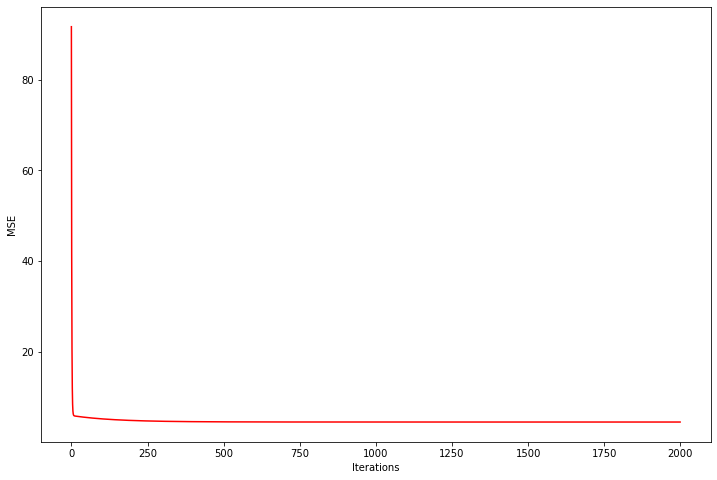

In [9]:
fig,ax = plt.subplots(figsize=(12,8))
ax.set_ylabel('MSE')
ax.set_xlabel('Iterations')
_=ax.plot(range(n_iter),cost_history,'r-')

In [10]:
m = len(x)
X = np.reshape(df['x'].values,(m,1))
y = np.reshape(df['y'].values,(m,1))

In [11]:
def stocashtic_gradient_descent(X,y,theta,learning_rate=0.01,iterations=10):
    m = len(y)
    cost_history = np.zeros(iterations) 
    for it in range(iterations):
        cost =0.0
        for i in range(m):
            rand_ind = np.random.randint(0,m)
            X_i = X[rand_ind,:].reshape(1,X.shape[1])
            y_i = y[rand_ind].reshape(1,1)
            prediction = np.dot(X_i,theta)

            theta = theta -(1/m)*learning_rate*( X_i.T.dot((prediction - y_i)))
            cost += cal_cost(theta,X_i,y_i)
        cost_history[it]  = cost
        
    return theta, cost_history

In [12]:
lr =0.01
n_iter = 2000
theta = np.random.randn(2,1)
X_b = np.c_[np.ones((len(X),1)),X]
theta,cost_history = stocashtic_gradient_descent(X_b,y,theta,lr,n_iter)
print('Theta0:          {:0.3f},\nTheta1:          {:0.3f}'.format(theta[0][0],theta[1][0]))
print('Final cost/MSE:  {:0.3f}'.format(cost_history[-1]))
print('-------------------------')
for it in range(n_iter):
    print("Iterations: ",it," Cost Function Value: ",round(cost_history[it],3))

Theta0:          -3.797,
Theta1:          1.206
Final cost/MSE:  526.401
-------------------------
Iterations:  0  Cost Function Value:  1994.625
Iterations:  1  Cost Function Value:  817.398
Iterations:  2  Cost Function Value:  586.2
Iterations:  3  Cost Function Value:  590.165
Iterations:  4  Cost Function Value:  608.983
Iterations:  5  Cost Function Value:  529.711
Iterations:  6  Cost Function Value:  499.079
Iterations:  7  Cost Function Value:  589.999
Iterations:  8  Cost Function Value:  487.596
Iterations:  9  Cost Function Value:  536.145
Iterations:  10  Cost Function Value:  509.171
Iterations:  11  Cost Function Value:  660.949
Iterations:  12  Cost Function Value:  475.967
Iterations:  13  Cost Function Value:  597.24
Iterations:  14  Cost Function Value:  650.876
Iterations:  15  Cost Function Value:  540.765
Iterations:  16  Cost Function Value:  763.339
Iterations:  17  Cost Function Value:  587.289
Iterations:  18  Cost Function Value:  678.779
Iterations:  19  Cos

Iterations:  594  Cost Function Value:  319.096
Iterations:  595  Cost Function Value:  472.739
Iterations:  596  Cost Function Value:  515.566
Iterations:  597  Cost Function Value:  320.891
Iterations:  598  Cost Function Value:  480.752
Iterations:  599  Cost Function Value:  316.749
Iterations:  600  Cost Function Value:  425.654
Iterations:  601  Cost Function Value:  464.255
Iterations:  602  Cost Function Value:  532.479
Iterations:  603  Cost Function Value:  424.507
Iterations:  604  Cost Function Value:  410.82
Iterations:  605  Cost Function Value:  631.613
Iterations:  606  Cost Function Value:  397.847
Iterations:  607  Cost Function Value:  490.002
Iterations:  608  Cost Function Value:  513.73
Iterations:  609  Cost Function Value:  308.356
Iterations:  610  Cost Function Value:  653.439
Iterations:  611  Cost Function Value:  387.853
Iterations:  612  Cost Function Value:  335.213
Iterations:  613  Cost Function Value:  288.938
Iterations:  614  Cost Function Value:  49

Iterations:  976  Cost Function Value:  579.611
Iterations:  977  Cost Function Value:  297.814
Iterations:  978  Cost Function Value:  465.68
Iterations:  979  Cost Function Value:  310.565
Iterations:  980  Cost Function Value:  568.815
Iterations:  981  Cost Function Value:  399.215
Iterations:  982  Cost Function Value:  371.985
Iterations:  983  Cost Function Value:  440.129
Iterations:  984  Cost Function Value:  314.157
Iterations:  985  Cost Function Value:  446.369
Iterations:  986  Cost Function Value:  382.056
Iterations:  987  Cost Function Value:  494.215
Iterations:  988  Cost Function Value:  380.993
Iterations:  989  Cost Function Value:  415.51
Iterations:  990  Cost Function Value:  266.606
Iterations:  991  Cost Function Value:  517.384
Iterations:  992  Cost Function Value:  353.347
Iterations:  993  Cost Function Value:  540.759
Iterations:  994  Cost Function Value:  546.566
Iterations:  995  Cost Function Value:  457.529
Iterations:  996  Cost Function Value:  30

Iterations:  1476  Cost Function Value:  533.178
Iterations:  1477  Cost Function Value:  434.205
Iterations:  1478  Cost Function Value:  311.735
Iterations:  1479  Cost Function Value:  327.586
Iterations:  1480  Cost Function Value:  597.576
Iterations:  1481  Cost Function Value:  414.876
Iterations:  1482  Cost Function Value:  312.216
Iterations:  1483  Cost Function Value:  414.018
Iterations:  1484  Cost Function Value:  306.531
Iterations:  1485  Cost Function Value:  493.485
Iterations:  1486  Cost Function Value:  306.398
Iterations:  1487  Cost Function Value:  403.1
Iterations:  1488  Cost Function Value:  320.251
Iterations:  1489  Cost Function Value:  477.806
Iterations:  1490  Cost Function Value:  363.573
Iterations:  1491  Cost Function Value:  457.815
Iterations:  1492  Cost Function Value:  421.442
Iterations:  1493  Cost Function Value:  412.918
Iterations:  1494  Cost Function Value:  422.84
Iterations:  1495  Cost Function Value:  530.35
Iterations:  1496  Cost 

Iterations:  1976  Cost Function Value:  379.099
Iterations:  1977  Cost Function Value:  338.366
Iterations:  1978  Cost Function Value:  497.725
Iterations:  1979  Cost Function Value:  480.139
Iterations:  1980  Cost Function Value:  474.097
Iterations:  1981  Cost Function Value:  563.948
Iterations:  1982  Cost Function Value:  602.139
Iterations:  1983  Cost Function Value:  365.165
Iterations:  1984  Cost Function Value:  357.026
Iterations:  1985  Cost Function Value:  482.519
Iterations:  1986  Cost Function Value:  424.696
Iterations:  1987  Cost Function Value:  278.568
Iterations:  1988  Cost Function Value:  673.078
Iterations:  1989  Cost Function Value:  326.706
Iterations:  1990  Cost Function Value:  578.141
Iterations:  1991  Cost Function Value:  392.736
Iterations:  1992  Cost Function Value:  294.591
Iterations:  1993  Cost Function Value:  527.677
Iterations:  1994  Cost Function Value:  282.691
Iterations:  1995  Cost Function Value:  402.143
Iterations:  1996  C

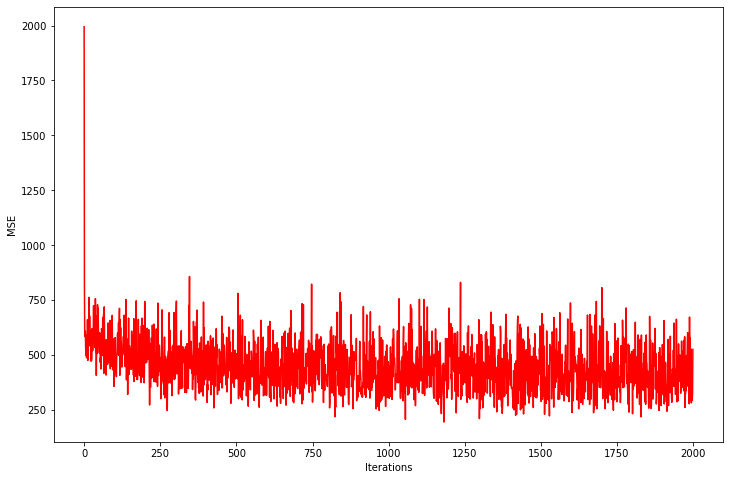

In [13]:
fig,ax = plt.subplots(figsize=(12,8))
ax.set_ylabel('MSE')
ax.set_xlabel('Iterations')
_=ax.plot(range(n_iter),cost_history,'r-')


In comparison to Normal Equation, Batch Mode gives the most accurate output than Stotastic and also converges faster. Although, Stotastic is less likely to have local minima and will take less amount of time to get the output

# c) Plot MSE vs. learning rate (using 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1) and determine the best learning rate.

Cost Function for LR  0.01 :  4.478
Cost Function for LR  0.02 :  4.477
Cost Function for LR  0.03 :  nan
Cost Function for LR  0.04 :  nan
Cost Function for LR  0.05 :  nan
Cost Function for LR  0.06 :  nan
Cost Function for LR  0.07 :  nan
Cost Function for LR  0.08 :  nan
Cost Function for LR  0.09 :  nan
Cost Function for LR  0.1 :  nan


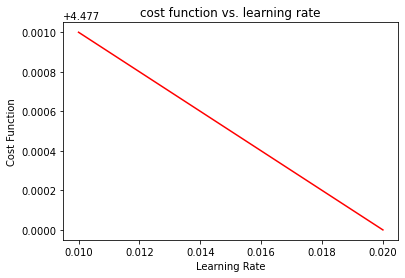

In [14]:
#For Batch
lr_list = [0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1]
cost_function_listB = []
for i in lr_list:
    lr =i
    n_iter = 2000
    theta = np.random.randn(2,1)
    X_b = np.c_[np.ones((len(x),1)),x]
    theta,cost_history,theta_history = gradient_descent(X_b,y,theta,lr,n_iter)
    cost_function_listB.append(round(cost_history[n_iter-1],3))
    print('Cost Function for LR ',lr,': ',round(cost_history[n_iter-1],3))
plt.plot(lr_list,cost_function_listB,'r-',)
plt.xlabel('Learning Rate')
plt.ylabel('Cost Function')
plt.title('cost function vs. learning rate')
plt.show()

Cost Function for LR  0.01 :  404.669
Cost Function for LR  0.02 :  628.86
Cost Function for LR  0.03 :  303.881
Cost Function for LR  0.04 :  250.254
Cost Function for LR  0.05 :  495.8
Cost Function for LR  0.06 :  363.84
Cost Function for LR  0.07 :  385.705
Cost Function for LR  0.08 :  306.48
Cost Function for LR  0.09 :  355.943
Cost Function for LR  0.1 :  515.933


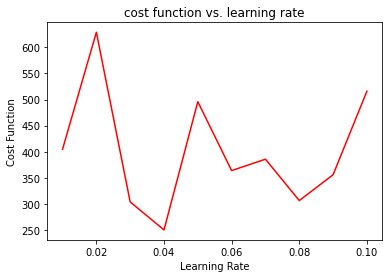

In [15]:
#For Stocastic
lr_list = [0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1]
cost_function_listS = []
for i in lr_list:
    lr =i
    n_iter = 2000
    theta = np.random.randn(2,1)
    X_b = np.c_[np.ones((len(x),1)),x]
    theta,cost_history = stocashtic_gradient_descent(X_b,y,theta,lr,n_iter)
    cost_function_listS.append(round(cost_history[n_iter-1],3))
    print('Cost Function for LR ',lr,': ',round(cost_history[n_iter-1],3))
plt.plot(lr_list,cost_function_listS,'r-',)
plt.xlabel('Learning Rate')
plt.ylabel('Cost Function')
plt.title('cost function vs. learning rate')
plt.show()

As seen above to minimize the cost function the value with the lowest learning rate (which varies from 0.03 to 0.04) is taken for both the models